# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [286]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.datasets import make_circles

In [287]:
import warnings

warnings.filterwarnings("ignore")

Let's generate our dataset and take a look on it.

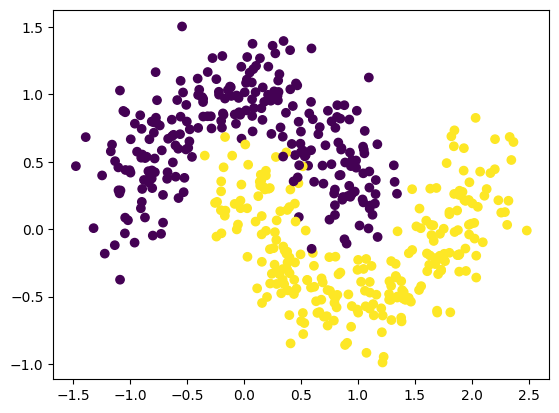

In [288]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)
plt.show()

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [289]:
def plot_decisions(X, y, clf, title="Классификация"):
    plt.figure(figsize=(7, 7))
    plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(title)
    plt.show()

In [290]:
lr = LogisticRegression(
    solver="saga", tol=1e-3, max_iter=500, C=1, penalty="l2"
)  # add some params
svm = SVC(kernel="linear", C=1.0)  # here too

### YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(
    moons_points, moons_labels, test_size=0.3, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_svm = svm.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Точность с LR:", round(accuracy_lr, 2))
print("Точность с SVM:", round(accuracy_svm, 2))

Точность с LR: 0.87
Точность с SVM: 0.87


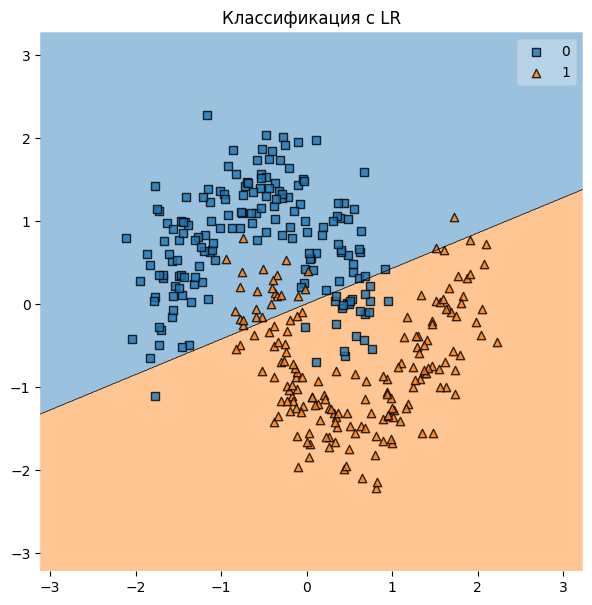

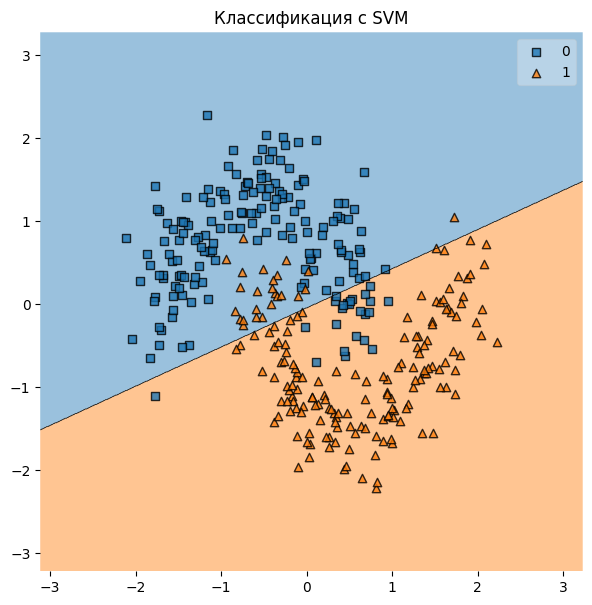

In [291]:
plot_decisions(X_train, y_train, clf=lr, title="Классификация с LR")
plot_decisions(X_train, y_train, clf=svm, title="Классификация с SVM")

Для логистической регрессии я выбрал параметры, которые оказались лучшими в прошлый раз и точность получилась 0.87. В качестве метрики качества я выбрал accuracy, так как в датасете не наблюдается дизбаланса класов.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [296]:
### YOUR CODE HERE

In [293]:
poly_params = {
    "C": [0.01, 0.1, 1, 10, 100],
    "degree": [1, 2, 3, 4, 5],
    "gamma": ["scale", "auto"],
    "coef0": [0, 1, 2],
}

poly_grid_search = GridSearchCV(
    SVC(kernel="poly"), poly_params, cv=5, scoring="accuracy"
)
poly_grid_search.fit(X_train, y_train)

y_pred_poly = poly_grid_search.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
f1_poly = f1_score(y_test, y_pred_poly)

In [294]:
print(poly_grid_search.best_params_)
print("Accuracy:", round(accuracy_poly, 3))
print("F1 Score:", round(f1_poly, 3))

{'C': 100, 'coef0': 1, 'degree': 3, 'gamma': 'auto'}
Accuracy: 0.973
F1 Score: 0.973


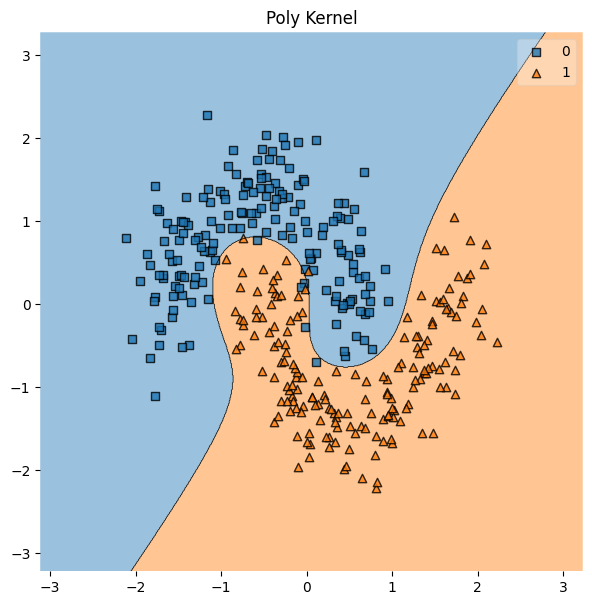

In [295]:
plot_decisions(X_train, y_train, clf=poly_grid_search, title="Poly Kernel")

In [297]:
rbf_params = {"C": [0.01, 0.1, 1, 10, 100], "gamma": ["scale", "auto"]}

rbf_grid_search = GridSearchCV(SVC(kernel="rbf"), rbf_params, cv=5, scoring="accuracy")
rbf_grid_search.fit(X_train, y_train)

y_pred_rbf = rbf_grid_search.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)

In [298]:
print(rbf_grid_search.best_params_)
print("Accuracy:", round(accuracy_rbf, 3))
print("F1 Score:", round(f1_rbf, 3))

{'C': 10, 'gamma': 'scale'}
Accuracy: 0.987
F1 Score: 0.986


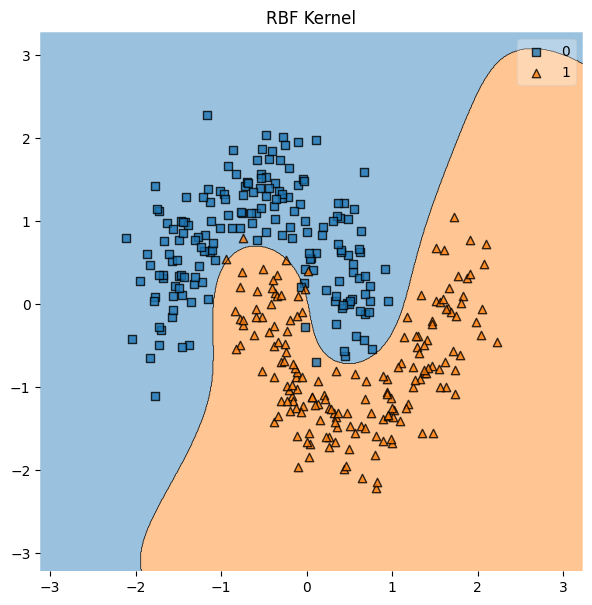

In [299]:
plot_decisions(X_train, y_train, clf=rbf_grid_search, title="RBF Kernel")

In [300]:
sigmoid_params = {
    "C": [0.01, 0.1, 1, 10, 100],
    "gamma": ["scale", "auto"],
    "coef0": [0, 1, 2],
}

sigmoid_grid_search = GridSearchCV(
    SVC(kernel="sigmoid"), sigmoid_params, cv=5, scoring="accuracy"
)
sigmoid_grid_search.fit(X_train, y_train)

y_pred_sigmoid = sigmoid_grid_search.predict(X_test)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
f1_sigmoid = f1_score(y_test, y_pred_sigmoid)

In [301]:
print(sigmoid_grid_search.best_params_)
print("Accuracy:", round(accuracy_sigmoid, 3))
print("F1 Score:", round(f1_sigmoid, 3))

{'C': 0.01, 'coef0': 2, 'gamma': 'scale'}
Accuracy: 0.827
F1 Score: 0.849


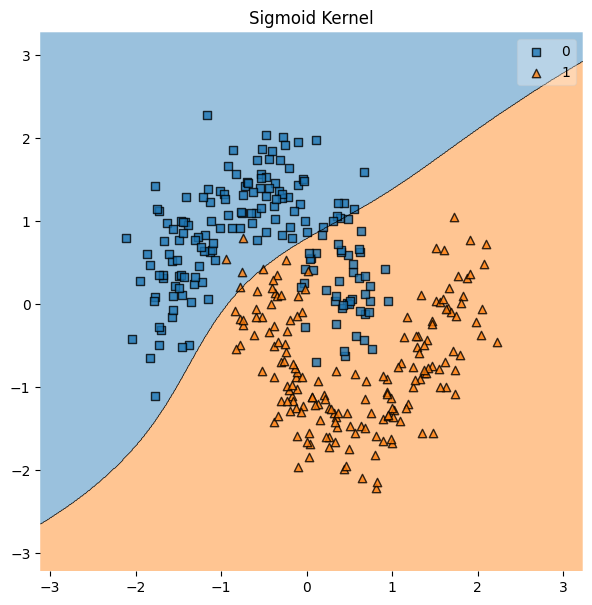

In [302]:
plot_decisions(X_train, y_train, clf=sigmoid_grid_search, title="Sigmoid Kernel")

Ответим на вопросы.
1. What have happenned with classification quality?
Лучшую точнность показала вторая модель (rbf), чууть хуже справилась вторая (poly) и сильно хуже -- третья модель (sigmoid). Но все три модели справились лучше обычной SVM.

2. How did decision border changed for each kernel?
В случае с полиномиальным ядром, понятно, график получился в формме параболы (в нашем случае третьей степени)
Радиальное ядро приспособилось к данным лучше полиномиального -- график получился более гибкий, с большим количеством изгибов, хотя и походе на полиномиальное ядро на первый взгляд.
Сигмода приспособилась хуже всего.
3. What degree have you chosen and why?
Видимо имеется в виду параметр степени в полиномиальном ядре. Выбрал я его с помощью GridSearchCV, однако и без него из самого первого графика можно было догадаться, что нужна именно третья степень.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [303]:
### YOUR CODE HERE
poly_degree = 3

poly_lr = make_pipeline(
    PolynomialFeatures(degree=poly_degree),
    LogisticRegression(solver="saga", tol=1e-3, max_iter=500, C=1, penalty="l2"),
)

poly_lr.fit(X_train, y_train)
y_pred = poly_lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_poly_lr = f1_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 3))
print("F1 Score:", round(f1_poly_lr, 3))

Accuracy: 0.98
F1 Score: 0.98


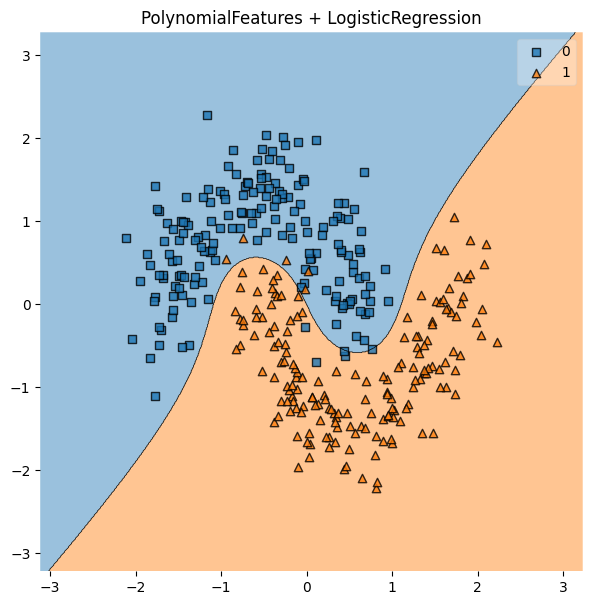

In [304]:
plot_decisions(
    X_train, y_train, clf=poly_lr, title="PolynomialFeatures + LogisticRegression"
)

Точность персказания получилась сопоставимой с тоностью при использовании SVM с полиномиалным и радиальным ядрмами.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

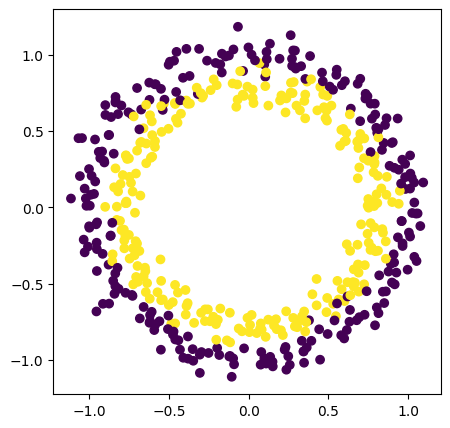

In [305]:
circles_points, circles_labels = make_circles(
    n_samples=500, noise=0.06, random_state=42
)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)
plt.show()

In [306]:
### YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(
    circles_points, circles_labels, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Начнем с логистической регрессии с дополнительно сгенерированными фичами.

In [307]:
param_grid_lr = {
    "polynomialfeatures__degree": [2, 3, 4, 5, 6],
    "logisticregression__C": [0.01, 0.1, 1, 10, 100],
}

pipeline_lr = Pipeline(
    [
        ("polynomialfeatures", PolynomialFeatures()),
        (
            "logisticregression",
            LogisticRegression(
                multi_class="multinomial",
                solver="saga",
                tol=1e-3,
                max_iter=1000,
                penalty="l2",
            ),
        ),
    ]
)

lr_grid_search = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring="accuracy")
lr_grid_search.fit(X_train, y_train)

y_pred_lr = lr_grid_search.predict(X_test)
accuracy_poly_lr = accuracy_score(y_test, y_pred_lr)
f1_poly_lr = f1_score(y_test, y_pred_lr, average="macro")

In [308]:
print(lr_grid_search.best_params_)

print("Accuracy:", round(accuracy_poly_lr, 3))
print("F1 Score:", round(f1_poly_lr, 3))

{'logisticregression__C': 100, 'polynomialfeatures__degree': 5}
Accuracy: 0.94
F1 Score: 0.94


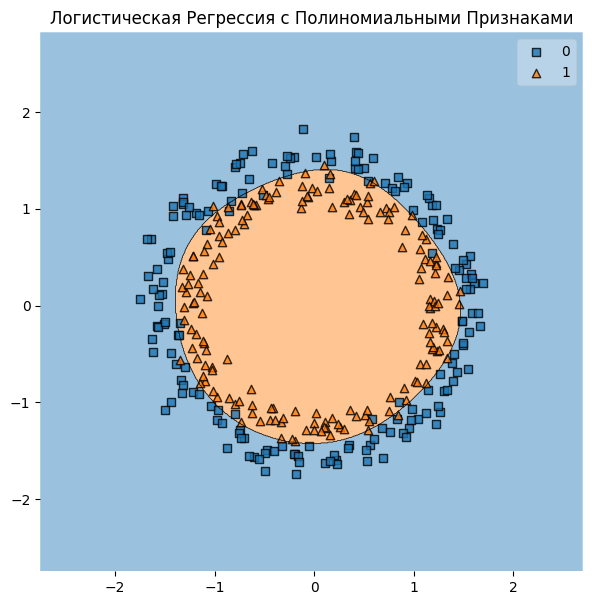

In [309]:
plot_decisions(
    X_train,
    y_train,
    lr_grid_search,
    "Логистическая Регрессия с Полиномиальными Признаками",
)

Теперь рассмотрим SVM c радисальным ядром.

In [310]:
rbf_params = {"C": [0.01, 0.1, 1, 10, 100], "gamma": ["scale", "auto"]}

rbf_grid_search = GridSearchCV(SVC(kernel="rbf"), rbf_params, cv=5, scoring="accuracy")
rbf_grid_search.fit(X_train, y_train)

y_pred_rbf = rbf_grid_search.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)

In [311]:
print(rbf_grid_search.best_params_)

print("Accuracy:", round(accuracy_rbf, 3))
print("F1 Score:", round(f1_rbf, 3))

{'C': 1, 'gamma': 'scale'}
Accuracy: 0.947
F1 Score: 0.945


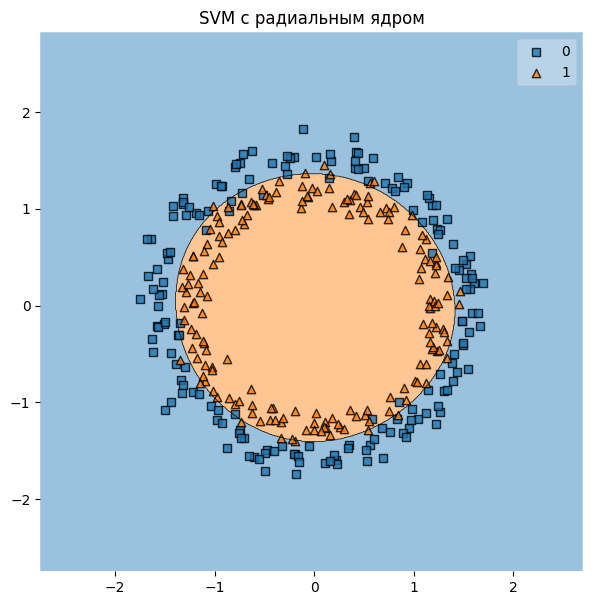

In [312]:
plot_decisions(X_train, y_train, rbf_grid_search, "SVM с радиальным ядром")

Как видим, обе модели справились одинаково хорошо, но немного лучше оказалась SVM с радиальным ядром (результат: Accuracy = 0.947, F1 score = 0.945).

And even more:

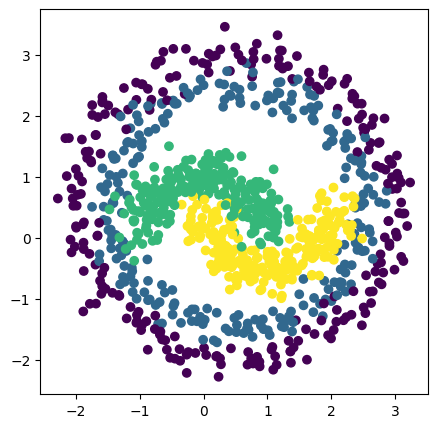

In [313]:
points = np.vstack((circles_points * 2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))  # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)
plt.show()

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Начнем с логистической регрессии с дополнительно сгенерированными фичами.

In [314]:
### YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(
    points, labels, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [315]:
param_grid_lr = {
    "polynomialfeatures__degree": [2, 3, 4, 5, 6],
    "logisticregression__C": [0.01, 0.1, 1, 10, 100],
}

pipeline_lr = Pipeline(
    [
        ("polynomialfeatures", PolynomialFeatures()),
        (
            "logisticregression",
            LogisticRegression(
                multi_class="multinomial",
                solver="saga",
                tol=1e-3,
                max_iter=1000,
                penalty="l2",
            ),
        ),
    ]
)

lr_grid_search = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring="accuracy")
lr_grid_search.fit(X_train, y_train)

y_pred_lr = lr_grid_search.predict(X_test)
accuracy_poly_lr = accuracy_score(y_test, y_pred_lr)
f1_poly_lr = f1_score(y_test, y_pred_lr, average="macro")

In [316]:
print(lr_grid_search.best_params_)

print("Accuracy:", round(accuracy_poly_lr, 3))
print("F1 Score:", round(f1_poly_lr, 3))

{'logisticregression__C': 10, 'polynomialfeatures__degree': 4}
Accuracy: 0.907
F1 Score: 0.907


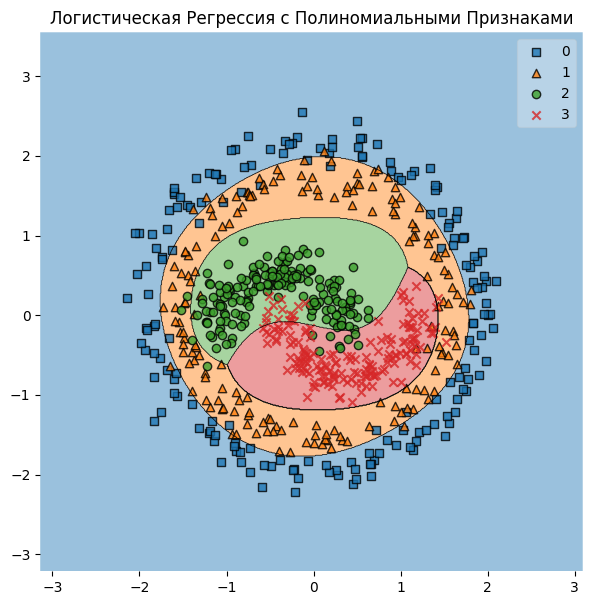

In [317]:
plot_decisions(
    X_train,
    y_train,
    lr_grid_search,
    "Логистическая Регрессия с Полиномиальными Признаками",
)

Теперь рассмотрим SVM c радисальным ядром.

In [318]:
rbf_params = {"C": [0.01, 0.1, 1, 10, 100], "gamma": ["scale", "auto"]}

rbf_grid_search = GridSearchCV(SVC(kernel="rbf"), rbf_params, cv=5, scoring="accuracy")
rbf_grid_search.fit(X_train, y_train)

y_pred_rbf = rbf_grid_search.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf, average="macro")

In [319]:
print(rbf_grid_search.best_params_)

print("Accuracy:", round(accuracy_rbf, 3))
print("F1 Score:", round(f1_rbf, 3))

{'C': 100, 'gamma': 'scale'}
Accuracy: 0.94
F1 Score: 0.941


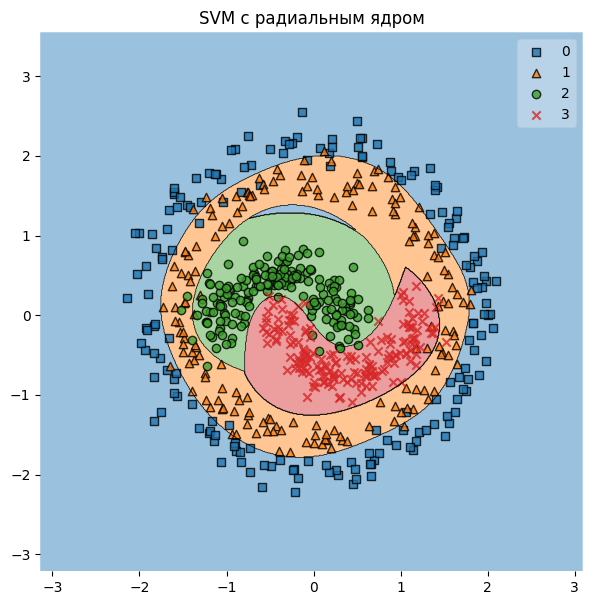

In [320]:
plot_decisions(X_train, y_train, rbf_grid_search, "SVM с радиальным ядром")

Как видим, обе модели справились достойно, но лучшей оказалась SVM с радиальным ядром (результат: Accuracy = 0.94, F1 score = 0.941).

__Вывод__. Итак, мы рассмотрели классификацию датасетов различного уровня сложности. Применив сырые логистическую регрессию и SVM, мы не добились хороших результатов. Однако, использовав генерацию дополнительных фичей для первой модели и нелинейные ядра для второй, мы получили прекрасную точность даже на довольно сложном датасете.